In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
testing_csv_file = 'testing_data.csv'
training_csv_file = 'training_data.csv'

test_df = pd.read_csv(testing_csv_file)
train_df = pd.read_csv(training_csv_file)

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- Loan_ID will be dropped since it gives no additional detial regarding each data entry.

In [4]:
train_df.drop(labels='Loan_ID', axis=1, inplace=True)

In [5]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### Encoding Categorical data
- Gender -> female:0, male:1
- Married -> No:0, Yes:1
- Dependents -> 0:0, 1:1, 2:2, 3+:3
- Education -> NotGraduate:0, Graduate:1
- Self_Employed -> No:0, Yes:1
- Property_Area -> Urban:0, Semiurban:1, Rural:2
- Loan_Status -> N:0, Y:1

In [6]:
# Enoding data
train_df['Gender'] = train_df['Gender'].map({'Female': 0, 'Male': 1})
train_df['Married'] = train_df['Married'].map({'No': 0, 'Yes': 1})
train_df['Dependents'] = train_df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
train_df['Education'] = train_df['Education'].map({'Not Graduate': 0, 'Graduate': 1})
train_df['Self_Employed'] = train_df['Self_Employed'].map({'No': 0, 'Yes': 1})
train_df['Property_Area'] = train_df['Property_Area'].map({'Urban': 0, 'Semiurban': 1, 'Rural': 2})
train_df['Loan_Status'] = train_df['Loan_Status'].map({'N': 0, 'Y': 1})

train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


### Data Imputation
##### Dealing with NaN values
- Replacing NaN values of categorical values with their feature vector mode.
- Replaceing NaN values of continous values with their feature vector median.

##### Missing Values per Attribute
- Gender: 13 missing
- Married: 3 missing
- Dependents: 15 missing
- Self_Employed: 32 missing
- Loan_Amount: 22 missing
- Loan_Amount_Term: 14 missing
- Credit_History: 50 missing

In [7]:
mode = train_df.mode()

# Categorical Data Imputation
train_df['Gender'].fillna(value=int(mode['Gender']), inplace=True)
train_df['Married'].fillna(value=int(mode['Married']), inplace=True)
train_df['Dependents'].fillna(value=int(mode['Dependents']), inplace=True)
train_df['Self_Employed'].fillna(value=int(mode['Self_Employed']), inplace=True)
train_df['Credit_History'].fillna(value=int(mode['Credit_History']), inplace=True)

# Continouos Data Imputation
train_df['LoanAmount'].fillna(value=train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(value=train_df['Loan_Amount_Term'].median(), inplace=True)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 57.7 KB


In [9]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


##### LOAN ELIGIBILITY REQUIREMENTS

#### Typically for a person to be eligbile for a loan the following criteria should be met.
- Credit Score and History.
- Income (Minimum income varies from bank to bank, here 20,000$ will be taken into consideration.
- Debt-to-Income ratio (Expressed as percentage, ideally a DTI less than 36% is ideal, but for a highly qualified applicant ratio less than 50% could be taken into consideration).


## Data Analysis - Discrete Data
- Gender
- Married
- Dependents
- Education
- Self_Employed
- Credit_History
- Property_Area
- Loan_Status

In [10]:
labeled_data = train_df.copy()
labeled_data['Gender'] = labeled_data['Gender'].map({0:'Female', 1:'Male'})
labeled_data['Married'] = labeled_data['Married'].map({0: 'No', 1:'Yes'})
labeled_data['Dependents'] = labeled_data['Dependents'].map({0:'0', 1:'1', 2:'2', 3:'3+'})
labeled_data['Education'] = labeled_data['Education'].map({0:'Not Graduate', 1:'Graduate'})
labeled_data['Self_Employed'] = labeled_data['Self_Employed'].map({0:'No', 1:'Yes'})
labeled_data['Credit_History'] = labeled_data['Credit_History'].map({0:'No', 1:'Yes'})
labeled_data['Property_Area'] = labeled_data['Property_Area'].map({0:'Urban', 1:'Semiurban', 2:'Rural'})
labeled_data['Loan_Status'] = labeled_data['Loan_Status'].map({0:'N', 1:'Y'})

labeled_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,Yes,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Yes,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Yes,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Yes,Urban,Y


##### Questions to be asked for analyzing such dataset
- is data biased towards gender?
- do married applicants have a higher chance of getting accepted?
- does number of dependents play an important role in being eligible for a loan?
- Does educations have any relation with such decision?
- do self employed applicants have a higher chance of being accepted?
- Is previous Credit History needed?
- Is the final decision made based on the type of property to be purchased?

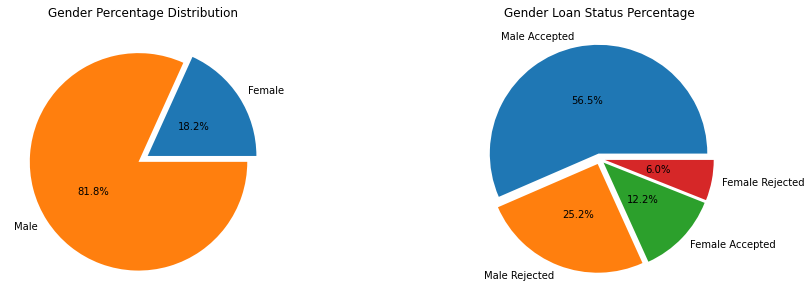

In [11]:
plt.figure(figsize=(15, 5))

gender_labels = np.unique(labeled_data['Gender'])
gender_count = [0, 0]
for applicant in labeled_data['Gender']:
    if applicant == 'Male':
        gender_count[1] += 1
    else:
        gender_count[0] += 1
        

gender_loan_status = ['Male Accepted', 'Male Rejected', 'Female Accepted', 'Female Rejected']
male_female_loan_status = [0, 0, 0, 0] #male_accepted, male_rejected, female_accepted, female_rejected
for applicant in labeled_data.values:
    if applicant[0] == 'Male' and applicant[-1] == 'Y':
        male_female_loan_status[0] += 1
    elif applicant[0] == 'Male' and applicant[-1] == 'N':
        male_female_loan_status[1] += 1
    elif applicant[0] == 'Female' and applicant[-1] == 'Y':
        male_female_loan_status[2] += 1
    else:
        male_female_loan_status[3] += 1

        

plt.subplot(1, 2, 1)
plt.title('Gender Percentage Distribution')
plt.pie(x=gender_count, autopct='%.1f%%', explode=[0.05] * 2, labels=gender_labels, pctdistance=0.5)

plt.subplot(1, 2, 2)
plt.title('Gender Loan Status Percentage')
plt.pie(x=male_female_loan_status, autopct='%.1f%%', explode=[0.05]*4, labels=gender_loan_status, pctdistance=0.5)

plt.show()

**Based on the visualizations above, majority of applicants are Male. Out of the 81.8% of Male applicants, 56.5% are accepted and 25.2% rejected. As for Females, out of the 18.2% 12.2% are accepted and the remaining 6% are rejected.**

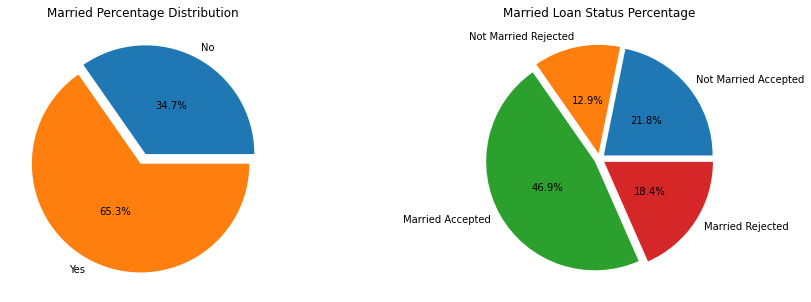

In [12]:
married_count = [0, 0]
married_label = np.unique(labeled_data['Married'])

for applicant in labeled_data['Married']:
    if applicant == 'No':
        married_count[0] += 1
    else:
        married_count[1] += 1

married_loan_labels = ['Not Married Accepted', 'Not Married Rejected', 'Married Accepted', 'Married Rejected']
married_loan_status = [0, 0, 0, 0] #not married accepted, not married rejected, married accepted, married rejected
for applicant in labeled_data.values:
    if applicant[1] == 'No' and applicant[-1] == 'Y':
        married_loan_status[0] += 1
    elif applicant[1] == 'No' and applicant[-1] == 'N':
        married_loan_status[1] += 1
    elif applicant[1] == 'Yes' and applicant[-1] == 'Y':
        married_loan_status[2] += 1
    else:
        married_loan_status[3] += 1

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Married Percentage Distribution')
plt.pie(x=married_count, autopct='%.1f%%', explode=[0.05]*2, labels=married_label, pctdistance=0.5)

plt.subplot(1, 2, 2)
plt.title('Married Loan Status Percentage')
plt.pie(x=married_loan_status, autopct='%.1f%%', explode=[0.05]*4, labels=married_loan_labels, pctdistance=0.5)

plt.show()

**Majority of applicants are married, largest percentage of accepted loans are married applicants, followed by not married but accepted, and followed by rejected applicants of both married and unmarried status.**

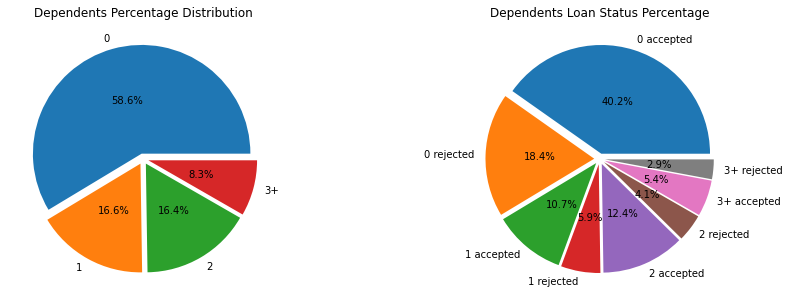

In [13]:
dependents_count = [0, 0, 0, 0]
dependent_labels = np.unique(labeled_data['Dependents'])

for applicant in labeled_data['Dependents']:
    if applicant == '0':
        dependents_count[0] += 1
    elif applicant == '1':
        dependents_count[1] += 1
    elif applicant == '2':
        dependents_count[2] += 1
    else:
        dependents_count[3] += 1

dependents_loan_status_label = ['0 accepted', '0 rejected', '1 accepted', '1 rejected', '2 accepted' , '2 rejected', '3+ accepted', '3+ rejected']
dependents_loan_status_count = [0, 0, 0, 0, 0, 0, 0, 0]

for applicant in labeled_data.values:
    if applicant[2] == '0' and applicant[-1] == 'Y':
        dependents_loan_status_count[0] += 1
    elif applicant[2] == '0' and applicant[-1] == 'N':
        dependents_loan_status_count[1] += 1
    elif applicant[2] == '1' and applicant[-1] == 'Y':
        dependents_loan_status_count[2] += 1
    elif applicant[2] == '1' and applicant[-1] == 'N':
        dependents_loan_status_count[3] += 1
    elif applicant[2] == '2' and applicant[-1] == 'Y':
        dependents_loan_status_count[4] += 1
    elif applicant[2] == '2' and applicant[-1] == 'N':
        dependents_loan_status_count[5] += 1
    elif applicant[2] == '3+' and applicant[-1] == 'Y':
        dependents_loan_status_count[6] += 1
    else:
        dependents_loan_status_count[7] += 1
    
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Dependents Percentage Distribution')
plt.pie(x=dependents_count, autopct='%.1f%%', explode=[0.05]*4, labels=dependent_labels, pctdistance=0.5)

plt.subplot(1, 2, 2)
plt.title('Dependents Loan Status Percentage')
plt.pie(x=dependents_loan_status_count, autopct='%.1f%%', explode=[0.05]*8, labels=dependents_loan_status_label, pctdistance=0.5)

plt.show()

**Based on the distribution, applicants with no dependents have a higher chance of being eligible for such loan under the circumstance that they meet and qualify for other requirements.**

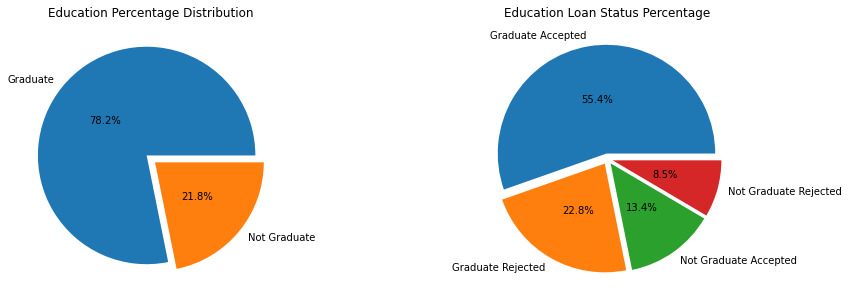

In [14]:
education_count = [0, 0]
education_label = np.unique(labeled_data['Education'])

for applicant in labeled_data['Education']:
    if applicant == 'Graduate':
        education_count[0] += 1
    else:
        education_count[1] += 1

education_loan_status_label = ['Graduate Accepted', 'Graduate Rejected', 'Not Graduate Accepted', 'Not Graduate Rejected']
education_loan_status = [0, 0, 0, 0]

for applicant in labeled_data.values:
    if applicant[3] == 'Graduate' and applicant[-1] == 'Y':
        education_loan_status[0] += 1
    elif applicant[3] == 'Graduate' and applicant[-1] == 'N':
        education_loan_status[1] += 1
    elif applicant[3] == 'Not Graduate' and applicant[-1] == 'Y':
        education_loan_status[2] += 1
    else:
        education_loan_status[3] += 1
        

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Education Percentage Distribution')
plt.pie(x=education_count, autopct='%.1f%%', explode=[0.05]*2, labels=education_label, pctdistance=0.5)

plt.subplot(1, 2, 2)
plt.title('Education Loan Status Percentage')
plt.pie(x=education_loan_status, autopct='%.1f%%', explode=[0.05]*4, labels=education_loan_status_label, pctdistance=0.5)

plt.show()

**Majority of applicants have graduated as compared to applicants that havent graduated. Graduated applicants have a 55.4% chance of being accepted whereas applicants that have not graduated have a 13.4% chance of being accepted.**

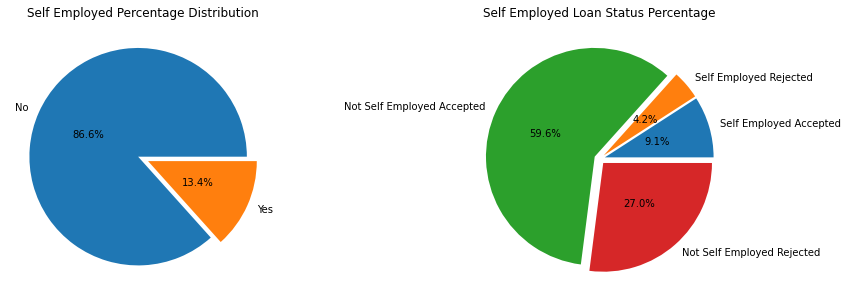

In [15]:
self_employed_labels = np.unique(labeled_data['Self_Employed'])
self_employed_count = [0, 0]

for applicant in labeled_data['Self_Employed']:
    if applicant == 'No':
        self_employed_count[0] += 1
    else:
        self_employed_count[1] += 1


self_employed_loan_status_count = [0, 0, 0, 0]
self_employed_loan_status_labels = ['Self Employed Accepted', 'Self Employed Rejected', 'Not Self Employed Accepted', 'Not Self Employed Rejected']

for applicant in labeled_data.values:
    if applicant[4] == 'Yes' and applicant[-1] == 'Y':
        self_employed_loan_status_count[0] += 1
    elif applicant[4] == 'Yes' and applicant[-1] == 'N':
        self_employed_loan_status_count[1] += 1
    elif applicant[4] == 'No' and applicant[-1] == 'Y':
        self_employed_loan_status_count[2] += 1
    else:
        self_employed_loan_status_count[3] += 1


plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Self Employed Percentage Distribution')
plt.pie(x=self_employed_count, autopct='%.1f%%', explode=[0.05]*2, labels=self_employed_labels, pctdistance=0.5)

plt.subplot(1, 2, 2)
plt.title('Self Employed Loan Status Percentage')
plt.pie(x=self_employed_loan_status_count, autopct='%.1f%%', explode=[0.05]*4, labels=self_employed_loan_status_labels, pctdistance=0.5)

plt.show()

**Majority of applicants are not self employed, and when it comes to being eligible it is clear to say that self employed applicants have a lower chance of being accepted due to the fact that such applicants dont have a steady source of income and most importantly their monthly income varies from time to time.**

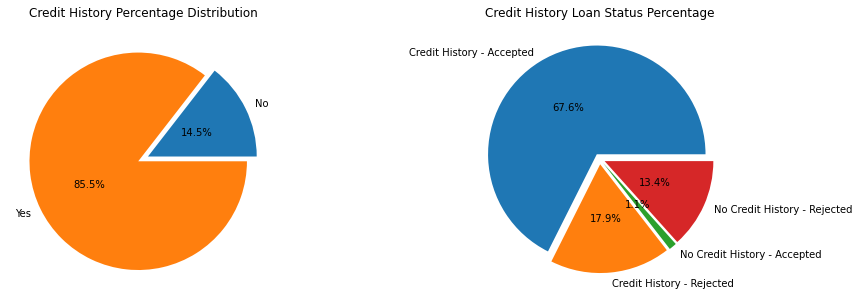

In [16]:
credit_history_count = [0, 0]
credit_history_labels = np.unique(labeled_data['Credit_History'])

for applicant in labeled_data['Credit_History']:
    if applicant == 'No':
        credit_history_count[0] += 1
    else:
        credit_history_count[1] += 1

        
credit_history_loan_status_count = [0, 0, 0, 0]
credit_history_loan_status_labels = ['Credit History - Accepted', 'Credit History - Rejected', 'No Credit History - Accepted', 'No Credit History - Rejected']

for applicant in labeled_data.values:
    if applicant[9] == 'Yes' and applicant[-1] == 'Y':
        credit_history_loan_status_count[0] += 1
    elif applicant[9] == 'Yes' and applicant[-1] == 'N':
        credit_history_loan_status_count[1] += 1
    elif applicant[9] == 'No' and applicant[-1] == 'Y':
        credit_history_loan_status_count[2] += 1
    else:
        credit_history_loan_status_count[3] += 1
        

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Credit History Percentage Distribution')
plt.pie(x=credit_history_count, autopct='%.1f%%', explode=[0.05]*2, labels=credit_history_labels, pctdistance=0.5)

plt.subplot(1, 2, 2)
plt.title('Credit History Loan Status Percentage')
plt.pie(x=credit_history_loan_status_count, autopct='%.1f%%', explode=[0.05]*4, labels=credit_history_loan_status_labels, pctdistance=0.5)

plt.show()

**Majority of applicants that have applied do have credit history as compared to the 14.5% of the applicants that dont have any previous credit history. As for being eligible, majority of applicants with credit history have a 67.6% chance of being accepted, but still this attribute is important to understand if such applicant has previously paid back their dues on time and if whether they are applicants that miss their payments.**

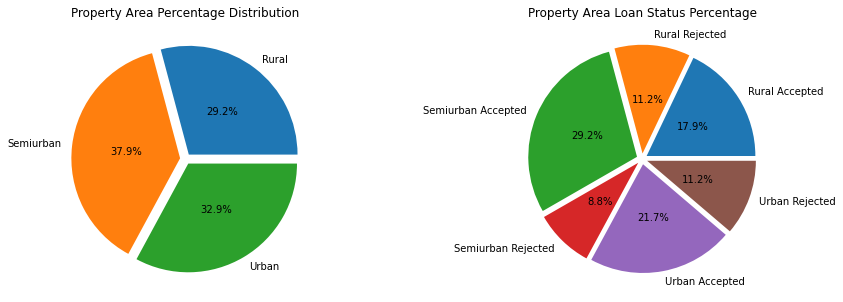

In [17]:
property_area_count = [0, 0, 0]
property_area_labels = np.unique(labeled_data['Property_Area'])

for applicant in labeled_data['Property_Area']:
    if applicant == 'Rural':
        property_area_count[0] += 1
    elif applicant == 'Semiurban':
        property_area_count[1] += 1
    else:
        property_area_count[2] += 1
        

property_area_loan_status_labels = ['Rural Accepted', 'Rural Rejected', 'Semiurban Accepted', 'Semiurban Rejected', 'Urban Accepted', 'Urban Rejected']
property_area_loan_status_count = [0, 0, 0, 0, 0, 0]

for applicant in labeled_data.values:
    if applicant[10] == 'Rural' and applicant[-1] == 'Y':
        property_area_loan_status_count[0] += 1
    elif applicant[10] == 'Rural' and applicant[-1] == 'N':
        property_area_loan_status_count[1] += 1
    elif applicant[10] == 'Semiurban' and applicant[-1] == 'Y':
        property_area_loan_status_count[2] += 1
    elif applicant[10] == 'Semiurban' and applicant[-1] == 'N':
        property_area_loan_status_count[3] += 1
    elif applicant[10] == 'Urban' and applicant[-1] == 'Y':
        property_area_loan_status_count[4] += 1
    else:
        property_area_loan_status_count[5] += 1
        

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Property Area Percentage Distribution')
plt.pie(x=property_area_count, autopct='%.1f%%', explode=[0.05]*3, labels=property_area_labels, pctdistance=0.5)

plt.subplot(1, 2, 2)
plt.title('Property Area Loan Status Percentage')
plt.pie(x=property_area_loan_status_count, autopct='%.1f%%', explode=[0.05]*6, labels=property_area_loan_status_labels, pctdistance=0.5)

plt.show()

**Data is approximately equally distributed with majority of applicants choosing an equal probability of choosing any of the suggested types of property. As for eligibility, this attribute doesnt seem to have a major influence of the final decision to be made.**

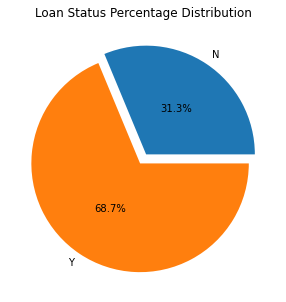

In [18]:
loan_status_count = [0, 0]
loan_status_labels = np.unique(labeled_data['Loan_Status'])
for applicant in labeled_data['Loan_Status']:
    if applicant == 'N':
        loan_status_count[0] += 1
    else:
        loan_status_count[1] += 1
        
plt.figure(figsize=(15, 5))
plt.title('Loan Status Percentage Distribution')
plt.pie(x=loan_status_count, autopct='%.1f%%', explode=[0.05]*2, labels=loan_status_labels, pctdistance=0.5)
plt.show()

**From this visualization, we can say that dataset is not equally distributed and if such data is trained on multiple models, the models might be prone to be in favor of predicting that the applicant is eligbile for a loan. And as such for such model to have to bias towards such case, dataset should be equally distributed.**

## Data Analysis - Continuous Data
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term

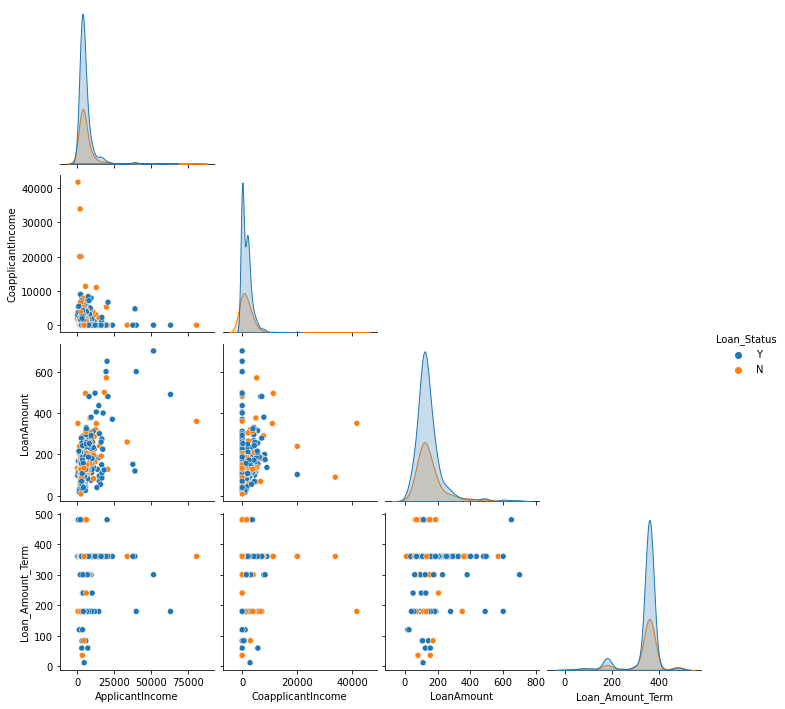

In [19]:
sns.pairplot(labeled_data, hue='Loan_Status', corner=True, kind='scatter')

**Based on the pairplot visualized above the following relationships will be discussed briefly.**
- Applicant Income vs Co-Applicant Income: No relation
- Applicant Income vs Loan Amount: Based on the scatter plot, there seems to be some linear relation with a values varying between 0 and 25000 for the majority of the cases.
- Applicant Income vs Loan Amount Term: No Relation, but it seems that majority of applicants choose a loan term of 360 more commonly than other terms.
- Co-Applicant Income vs LoanAmount: Similarly, there seems to be some linear relationship with a variance varying between 0 and 20,000.
- Co-Applicant Income vs Loan Amount Term: No relation, but most commonly applicants choose either loan terms of 180 or 360 months.
- Loan Amount vs Loan Amount Term: from the scatter plot, we can say that as loan amount increases loan amount term also increases in majority of the cases.

<AxesSubplot:title={'center':'Co-Applicant Income Distribution'}, xlabel='CoapplicantIncome', ylabel='Count'>

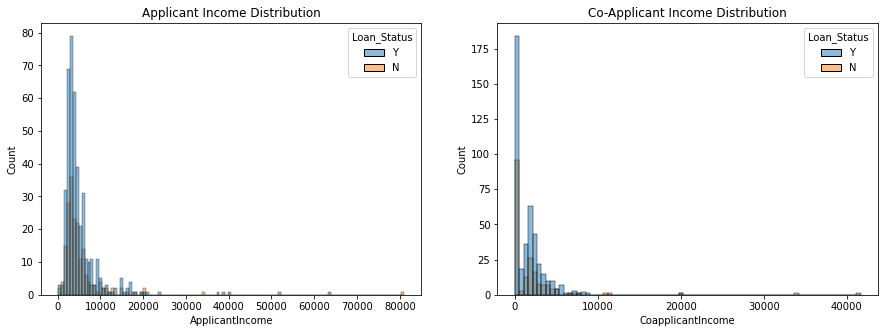

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Applicant Income Distribution')
sns.histplot(x='ApplicantIncome', hue='Loan_Status', data=labeled_data)

plt.subplot(1, 2, 2)
plt.title('Co-Applicant Income Distribution')
sns.histplot(x='CoapplicantIncome', hue='Loan_Status', data=labeled_data)

<AxesSubplot:title={'center':'Loan Amount Term Distribution'}, xlabel='Loan_Amount_Term', ylabel='count'>

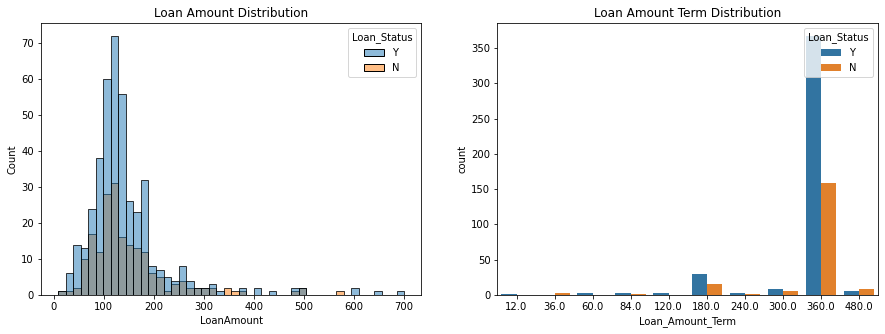

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loan Amount Distribution')
sns.histplot(x='LoanAmount', hue='Loan_Status', data=labeled_data)

plt.subplot(1, 2, 2)
plt.title('Loan Amount Term Distribution')
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=labeled_data)

In [22]:
applicant_income = labeled_data['ApplicantIncome']
co_applicant_income = labeled_data['CoapplicantIncome']
self_employed = np.array([labeled_data['ApplicantIncome'][i] for i, applicant in enumerate(labeled_data['Self_Employed']) if applicant == 'Yes'])
loan_amount = labeled_data['LoanAmount']
loan_amount_term = labeled_data['Loan_Amount_Term']

applicant_data = [applicant_income.min(), applicant_income.max(), applicant_income.mean()]
co_applicant_data = [co_applicant_income.min(), co_applicant_income.max(), co_applicant_income.mean()]
self_employed_data = [self_employed.min(), self_employed.max(), self_employed.mean()]
loan_amount_data = [loan_amount.min() * 1000, loan_amount.max() * 1000, loan_amount.mean() * 1000]
loan_amount_term_data = [loan_amount_term.min(), loan_amount_term.max(), loan_amount_term.mean()]

applicants_data_df = pd.DataFrame(data=np.row_stack((applicant_data, co_applicant_data, self_employed_data, loan_amount_data, loan_amount_term_data)),
                                 index=['Applicant Income $', 'Coapplicant Income $', 'Self Employed Income $', 'Loan Amount $', 'Loan Amount Term (months)'],
                                 columns=['Minimum', 'Maximum', 'Average'])
applicants_data_df

,Minimum,Maximum,Average
Applicant Income $,150.0,81000.0,5403.459283
Coapplicant Income $,0.0,41667.0,1621.245798
Self Employed Income $,674.0,39147.0,7380.817073
Loan Amount $,9000.0,700000.0,145752.442997
Loan Amount Term (months),12.0,480.0,342.410423


#### Understanding relationship between property type and applicants income (only accepted applicants)
- Based on applicants income we can understand how much income is needed to purchase such properties.

In [23]:
urban_property_applicant_incomes = [labeled_data['ApplicantIncome'][i] for i, applicant in enumerate(labeled_data['Property_Area']) if applicant == 'Urban' and labeled_data['Loan_Status'][i] == 'Y']
semiurban_property_applicant_incomes = [labeled_data['ApplicantIncome'][i] for i, applicant in enumerate(labeled_data['Property_Area']) if applicant == 'Semiurban' and labeled_data['Loan_Status'][i] == 'Y']
rural_property_applicant_incomes = [labeled_data['ApplicantIncome'][i] for i, applicant in enumerate(labeled_data['Property_Area']) if applicant == 'Rural' and labeled_data['Loan_Status'][i] == 'Y']

urban_prop_data = [min(urban_property_applicant_incomes), max(urban_property_applicant_incomes), sum(urban_property_applicant_incomes) // len(urban_property_applicant_incomes)]
semiurban_prop_data = [min(semiurban_property_applicant_incomes), max(semiurban_property_applicant_incomes), sum(semiurban_property_applicant_incomes) // len(semiurban_property_applicant_incomes)]
rural_prop_data = [min(rural_property_applicant_incomes), max(rural_property_applicant_incomes), sum(rural_property_applicant_incomes) // len(rural_property_applicant_incomes)]

property_app_income_df = pd.DataFrame(data=np.row_stack((urban_prop_data, semiurban_prop_data, rural_prop_data)),
                                     index=['Urban Property', 'Semiurban Property', 'Rural Property'],
                                     columns=['Minimum Income $', 'Maximum Income $', 'Average Income $'])

property_app_income_df

,Minimum Income $,Maximum Income $,Average Income $
Urban Property,1299,63337,5858
Semiurban Property,210,39999,5290
Rural Property,645,23803,4962


**For an applicant to purchase the mentioned property types and be eligible for a loan, the following criteria should be met.**

- Applicants apply to purchase an urban property when their income ranges from 1,299 USD - 63,337 USD, and on average they have an income of 5,858$.


- Applicants apply to purchase a semiurban property when their incomes ranges from 210 USD - 39,999 USD, and on average most applicants have an income of 5,290$.


- Applicants apply to purchase rural properties when their income ranges from 645 USD - 23,803 USD, and on average most applicants have an income of 4,962$.

#### Understanding relationship between property type and Loan Amount (Only accepted applicants)
- Based on the loan amount we can understand how much loan is needed to be taken to purchase such property type.

In [24]:
urban_property_loan_amount = [labeled_data['LoanAmount'][i] for i, applicant in enumerate(labeled_data['Property_Area']) if applicant == 'Urban' and labeled_data['Loan_Status'][i] == 'Y']
semiurban_property_loan_amount = [labeled_data['LoanAmount'][i] for i, applicant in enumerate(labeled_data['Property_Area']) if applicant == 'Semiurban' and labeled_data['Loan_Status'][i] == 'Y']
rural_property_loan_amount = [labeled_data['LoanAmount'][i] for i, applicant in enumerate(labeled_data['Property_Area']) if applicant == 'Rural' and labeled_data['Loan_Status'][i] == 'Y']

urban_prop_loan_amount_data = [min(urban_property_loan_amount)*1000, max(urban_property_loan_amount)*1000, sum(urban_property_loan_amount) // len(urban_property_loan_amount)*1000]
semiurban_prop_loan_amount_data = [min(semiurban_property_loan_amount)*1000, max(semiurban_property_loan_amount)*1000, sum(semiurban_property_loan_amount) // len(semiurban_property_loan_amount)*1000]
rural_prop_loan_amount_data = [min(rural_property_loan_amount)*1000, max(rural_property_loan_amount)*1000, sum(rural_property_loan_amount) // len(rural_property_loan_amount)*1000]

property_loan_df = pd.DataFrame(data=np.row_stack((urban_prop_loan_amount_data, semiurban_prop_loan_amount_data, rural_prop_loan_amount_data)),
                               index=['Urban Property', 'Semiurban Property', 'Rural Property'],
                               columns=['Minimum Loan Amount $', 'Maximum Loan Amount $', 'Average Loan Amount $'])

property_loan_df

,Minimum Loan Amount $,Maximum Loan Amount $,Average Loan Amount $
Urban Property,17000.0,700000.0,142000.0
Semiurban Property,25000.0,600000.0,142000.0
Rural Property,40000.0,480000.0,147000.0


**For an applicant to be accepted and granted a loan the following criteria should be met**

- Applicants need on average a loan of 142,000$ to purchase urban property. [Minimum: 17,000 USD, Maximum: 700,000 USD]


- Applicants need on average a loan of 142,000$ to purchase Semiurban property. [Minimum: 25,000 USD, Maximum: 600,000 USD]


- Applicants neeed on average a loan of 147,000$ to purchase Rural property.[Minimum: 40,000 USD, Maximum: 480,000 USD]

## Data Analysis - Overall Data Correlation Study


<AxesSubplot:>

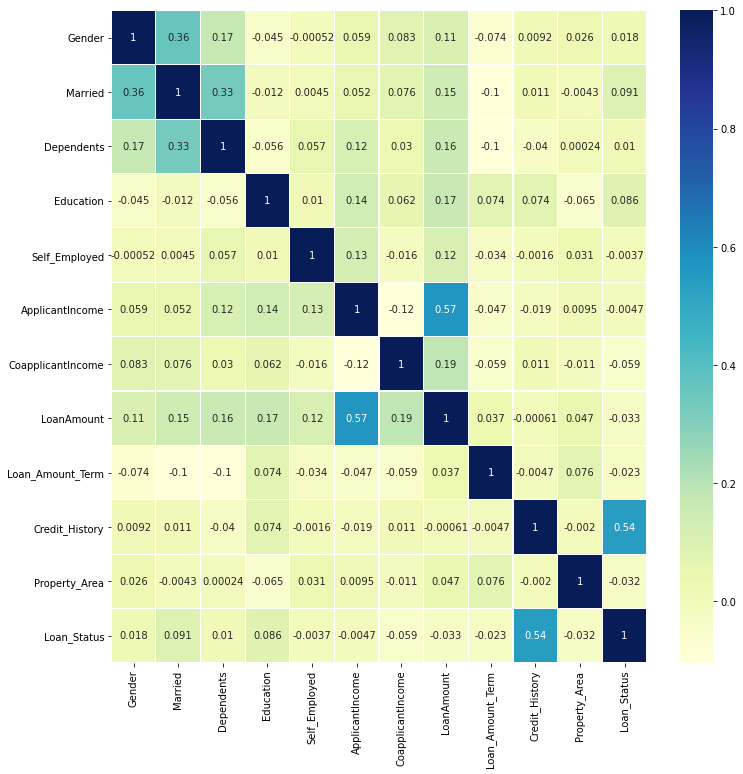

In [25]:
plt.figure(figsize=(12, 12))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, robust=True, cmap='YlGnBu', linewidths=0.1)

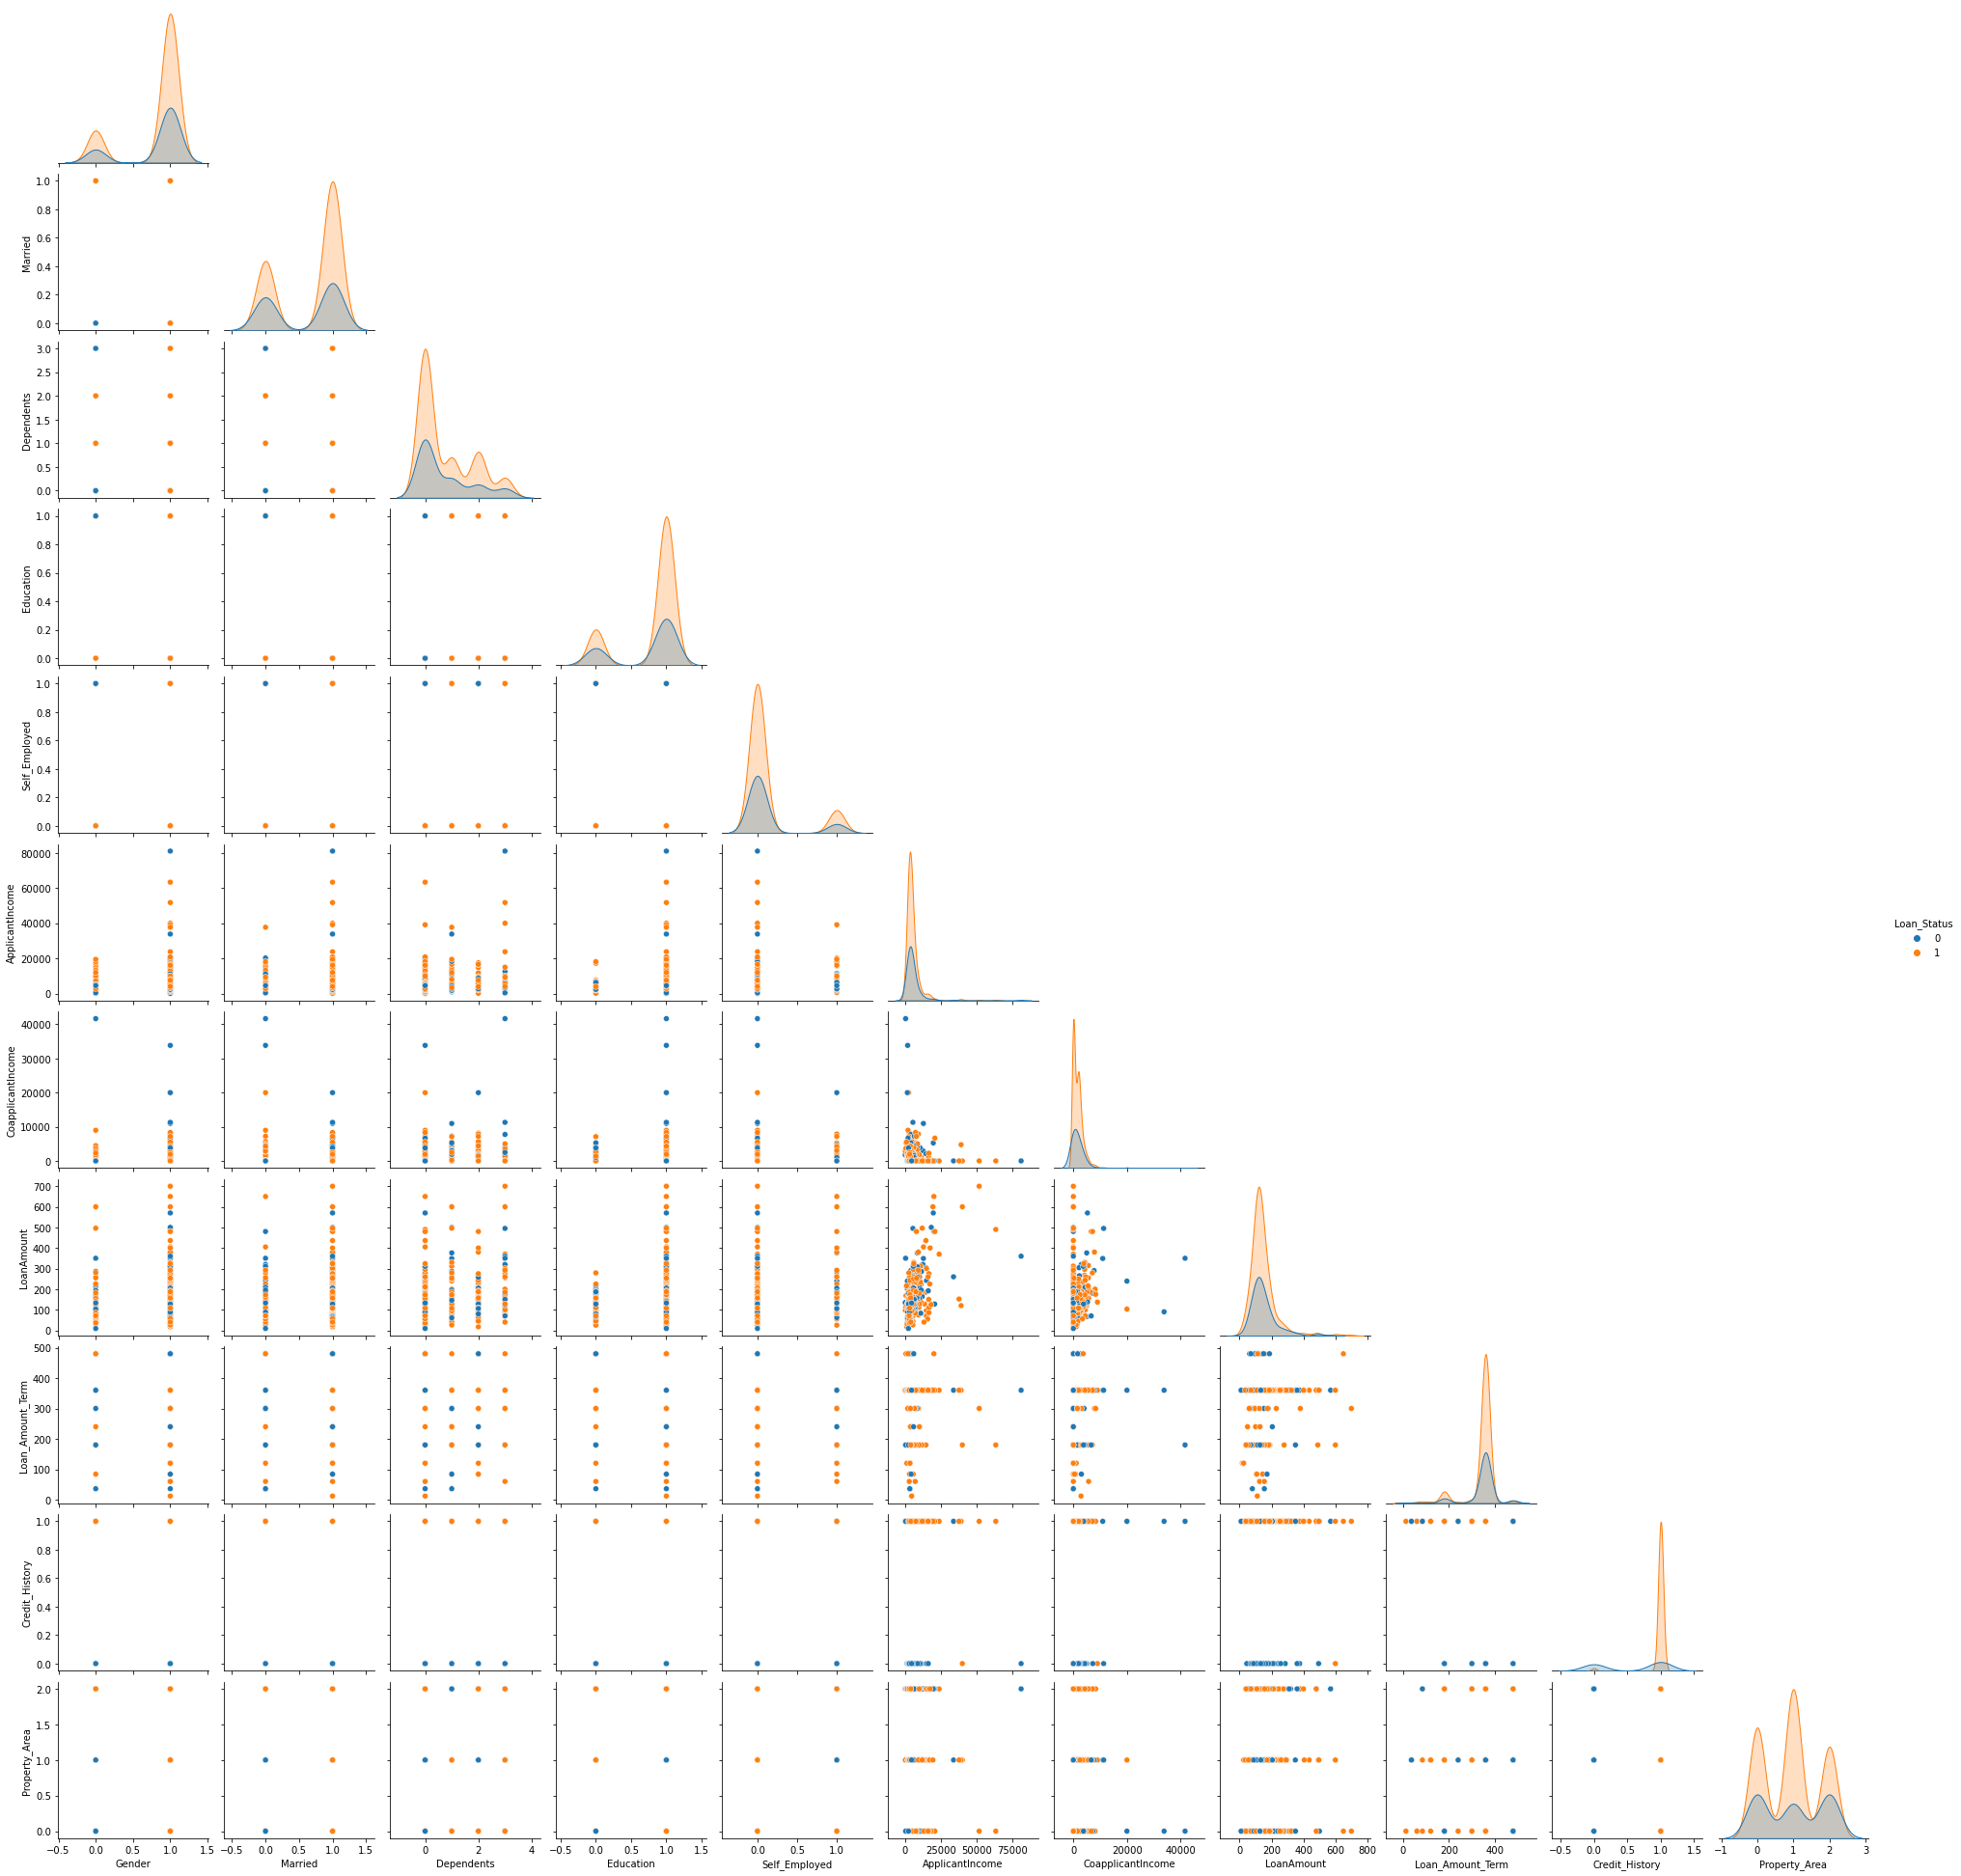

In [26]:
sns.pairplot(train_df, hue='Loan_Status', corner=True, kind='scatter')

**Feature Correlation Description - Assumptions made - Scores >= 0.1**
- Married - Gender (Correlation Score = 0.36): ?


- Dependents - Gender (Correlation Score = 0.17): ?


- Dependents - Married (Correlation Score = 0.33): An assumption can be made that if an applicant is married then there is a possiblity that they have dependents and this as a result when predicting eligibility for loan, indicates whether after all expenses does the applicant have enough income to pay back his loan.


- Applicant Income - Dependents (Correlation Score = 0.12): Similarly if a final decision had to be made regarding loan eligibility, income minus expenses of dependents indicates whether applicant has enough money to make monthly payments.


- Applicant Income - Education (Correlation Score = 0.14): Education is an indicator of whether the applicant is still studying, or has graduated. If applicant is still studying then it is highly possible that applicant has other payments to make on time. Another scenario is the level of education indicates a job position with high level income. Moreover for a final decision to be made applicants income and education level is taken into consideration.


- Applicant Income - Self_Employed (Correlation Score = 0.13):A self employed applicant simply put doesnt have a steady source of income on a monthly basis and there could be a possiblity that there are high fluctuations in the applicants monthly income and as such for a final decision to be made when granting loans, this is another feature that should be looked into.


- Loan Amount - Gender (Correlation Score = 0.11): ?


- Loan Amount - Married (Correlation Score = 0.15): Marital status of an applicant indicates whether after all expenses would there be enough to pay back their loan. Inother words if applicants other half has an occupation then this would be fine, but if it werent the case then this aspect should be taken into consideration.


- Loan Amount - Dependents (Correlation Score = 0.16): This correlation explores a side where the applicants expenses determines the amount of loan the applicant is eligible to take.


- Loan Amount - Education (Correlation Score = 0.17):This correlation explains that loan amount is related to the level of education an applicant, whether the applicant is currently studying, has graduated, or has no educational background.


- Loan Amount - Self_Employed (Correlation Score = 0.12): Similarly, applicants income should be enough to supply for paying back their loans, and for such case of being a self employed applicant monthly income should be enough to cover their own expenses and pay back their mortgage.


- Loan Amount - Applicant Income (Correlation Score = 0.57): This correlation indicates that based on the applicants income a loan amount should be taken based on their income in such a way that they are capable of paying back their monthly payments on time.


- Loan Amount - Co-Applicant Income (Correlation Score = 0.19): Similarly, this feature determines whether co-applicant income is sufficient enough to cover and payback their mortgage and as well as supplement their montly expenses.


- Loan Status - Credit History (Correlation Score = 0.54): This correlation,indicates whether an applicant has previous credit history. this is a good indicator of previous historical data which indicates whether applicant pays their mortgage on time or whether they have unpaid previous mortgages. This is an important feature to look at since it reveals financial historical data regarding their mortgages and other finances.


**Questions asked**

- is data biased towards gender?
- do married applicants have a higher chance of getting accepted?
- does number of dependents play an important role in being eligible for a loan?
- Does educations have any relation with such decision?
- do self employed applicants have a higher chance of being accepted?
- Is previous Credit History needed?
- Is the final decision made based on the type of property to be purchased?


**Response after visualizing and analyzing data**

- Majority of the data contains male dominant applicants, but visualizing the correlation matrix an observation can be made that gender and loan status have no significant correleation that would hugely impact the final decision made.


- Majority of the data contains applicant that are married which as a result contains the largest percentage for accepted loans, but this isnt a major factor that should be taken into consideration because number of dependents and income plays a huge role in such case.


- Pretty much, if an applicant has dependents they should backup their application by showing enough income to cover their personal expenses and as well as income to supplement loan payments, but data shows that majority of accepted loans are of applicants with zero dependents, but still applicants with dependents do have a good chance of being accepted given the fact that they supplement enough information to backup their expenses.


- a percentage of 78.2% of applicants are graduated meaning that such applicants cover a huge portion of the data.


- Self Employed applicants consist of a small percentage in terms of number of applicants. Overall, self employed have a lower chance of being accepted.

- Credit History is an attribute that should be taken into consideration, and is an important factor that reveals historical finances related to the applicant. And majority of applicants which consist of 85.5% have credit history.


- Property Type doesnt affect final decision to be made, since data shows almost an equiprobable chance of either being accepted or rejected.

## Summary

- Data is male dominant.
- 65.3% of applicants are married.
- 78.2% of applicants have graduated.
- 13.4% of applicants are self employed.
- 85.5% of applicants have credit history.
- 68.7% of applicants are eligible for loans.
- Income needed to be eligible for a loan and to purchase urban property ranges from 1,299 USD to 63,337 USD.
- Income needed to be eligible for a loan and to purchase semiurban property ranges from 210 USD to 39,999 USD.
- Income needed to be eligible for a loan and to purchase rural property ranges from 645 USD to 23,803 USD.
- Loan amount needed to be eligible for a loan and to purchase urban property ranges from 17,000 USD to 700,000 USD.
- Loan amount needed to be eligible for a loan and to purchase semiurban property ranges from 25,000 USD to 600,000 USD.
- Loan amount needed to be eligible for a loan and to purchase urban property ranges from 40,000 USD to 480,000 USD.
- 68.7% of applicants are eligible for loans, meaning that dataset is imbalanced.

# Machine Learning

**Procedure to follow:**
- Data Preprocessing (Outliers will be eliminated, Data will be either normalized or standardized).
- Data will be split into training and testing with a ratio of 80% being training and the remaining 20% testing.
- The following models will be trained (Logistic Regression, Decision Trees, KNN, Random Forest Classification).

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [28]:
mean = np.mean(train_df.values[:, :-1], axis=0)
standard_dev = np.std(train_df.values[:, :-1], axis=0)

lower_bound = [mean[i] - (2 * standard_dev[i]) for i in range(len(mean))]
upper_bound = [mean[i] + (2 * standard_dev[i]) for i in range(len(mean))]

print(lower_bound)
print()
print(upper_bound)


[0.04522473822650519, -0.2988763049503218, -1.2733021027651295, -0.04434488516728896, -0.5467869441330386, -6804.670429680161, -4226.483121513018, -22.324985479236062, 213.6581406978902, 0.15094572243591897, -0.6111402862932585]

[1.5899544148679574, 1.605065230031755, 2.7619014512993316, 1.6078628004767352, 0.8138879213317356, 17611.588996455404, 7468.97471756722, 313.8298714727214, 471.16270620764726, 1.559151997433788, 2.5362217195180143]


In [29]:
mean = np.mean(train_df, axis=0)
standard_dev = np.std(train_df, axis=0)

cleaned_data = []
labels = train_df.keys()
for i, row in enumerate(train_df.values):
    counter = 0
    for j, col in enumerate(row):
        # mu + 2sigma, mu - 2sigma
        if mean[j] - (1 * standard_dev[j]) < col < mean[j] + (1 * standard_dev[j]):
            counter += 1
    if counter < 12:
        cleaned_data.append(train_df.values[i])

data = np.array(cleaned_data)
print(data.shape)

(578, 12)


In [30]:
# data = train_df.values

X = data[:, :-1]
y = data[:, -1]

print(f"Data shape: {X.shape}, Labels: {y.shape}")

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
yhat = lof.fit_predict(X)
mask = yhat != -1

X = X[mask, :]
y = y[mask]

print(X.shape, y.shape)

Data shape: (578, 11), Labels: (578,)
(520, 11) (520,)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training: {x_train.shape},  labels: {y_train.shape}")
print(f"Testing: {x_test.shape},  labels: {y_test.shape}")

Training: (416, 11),  labels: (416,)
Testing: (104, 11),  labels: (104,)


In [32]:
# Good practice is to fit scaler to training data and then use it to transform the testing data.

normalize = MinMaxScaler().fit(x_train)
x_train_norm = normalize.transform(x_train)
x_test_norm = normalize.transform(x_test)

standardize = StandardScaler().fit(x_train)
x_train_standardize = standardize.transform(x_train)
x_test_standardize = standardize.transform(x_test)

print(f"Training: {x_train.shape},  labels: {y_train.shape}")
print(f"Testing: {x_test.shape},  labels: {y_test.shape}")

Training: (416, 11),  labels: (416,)
Testing: (104, 11),  labels: (104,)


In [33]:
pd.DataFrame(x_train_norm).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.0,1.0,1.0,0.0,0.100789,0.472828,0.219969,0.74359,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.080297,0.248276,0.177847,0.74359,0.0,0.5
2,1.0,1.0,0.0,0.0,0.0,0.006796,0.536552,0.299532,0.74359,0.0,0.5
3,1.0,0.0,0.0,0.0,0.0,0.123582,0.229793,0.156006,0.74359,1.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.189660,0.000000,0.185647,0.74359,1.0,0.5


In [34]:
pd.DataFrame(x_train_standardize).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.51797,0.782562,2.209053,0.551430,-0.406529,-0.468822,1.520110,0.108038,0.250755,0.414525,1.279422
1,0.51797,0.782562,-0.764947,-1.813466,-0.406529,-0.579958,0.420553,-0.251194,0.250755,-2.412400,0.041656
2,0.51797,0.782562,-0.764947,-1.813466,-0.406529,-0.978575,1.832146,0.786589,0.250755,-2.412400,0.041656
3,0.51797,-1.277854,-0.764947,-1.813466,-0.406529,-0.345211,0.330049,-0.437463,0.250755,0.414525,1.279422
4,0.51797,-1.277854,-0.764947,0.551430,2.459847,0.013147,-0.795174,-0.184670,0.250755,0.414525,0.041656


In [35]:
train_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.962541,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

In [37]:
# Having observed multiple models with different data either being normalized, standardized, or as itself
# normalized data has performed the best.

log_model = LogisticRegression(solver='liblinear', penalty='l2', C=10)
log_classifier = log_model.fit(x_train_norm, y_train)
predictions = log_classifier.predict(x_test_norm)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100}")

Model Accuracy: 88.46153846153845


In [38]:
cls_report = classification_report(y_test, predictions)
print(cls_report)

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77        32
         1.0       0.86      1.00      0.92        72

    accuracy                           0.88       104
   macro avg       0.93      0.81      0.85       104
weighted avg       0.90      0.88      0.88       104



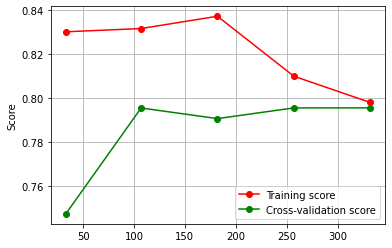

In [39]:
train_sizes, train_scores, test_scores = learning_curve(log_model, x_train_norm, y_train, cv=None)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.ylabel('Score')
plt.legend(loc="lower right")
plt.grid()

Text(33.0, 0.5, 'Actual')

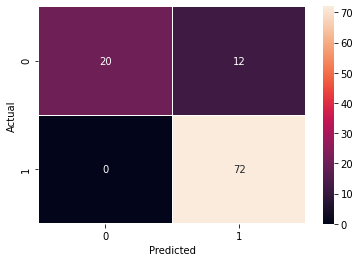

In [40]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, linewidths=0.1)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### Decision Trees

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [42]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_classifier = tree_model.fit(x_train_norm, y_train)
tree_predictions = tree_classifier.predict(x_test_norm)
tree_acc = accuracy_score(y_test, tree_predictions)
print(f"Decision Tree Accuracy: {tree_acc * 100}")

Decision Tree Accuracy: 88.46153846153845


In [43]:
tree_cls_report = classification_report(y_test, tree_predictions)
print(tree_cls_report)

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77        32
         1.0       0.86      1.00      0.92        72

    accuracy                           0.88       104
   macro avg       0.93      0.81      0.85       104
weighted avg       0.90      0.88      0.88       104



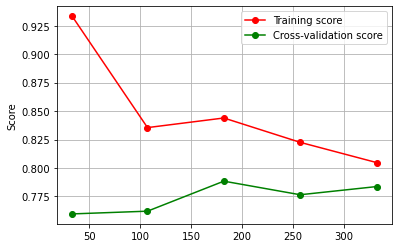

In [44]:
train_sizes, train_scores, test_scores = learning_curve(tree_model, x_train_norm, y_train, cv=None)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.ylabel('Score')
plt.legend(loc="upper right")
plt.grid()

Text(33.0, 0.5, 'Actual')

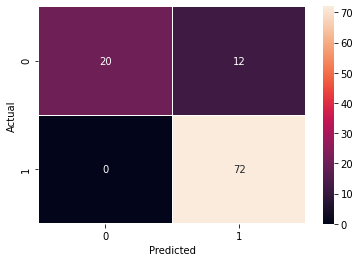

In [45]:
cm = confusion_matrix(y_test, tree_predictions)
sns.heatmap(cm, annot=True, linewidths=0.1)
plt.xlabel('Predicted')
plt.ylabel('Actual')

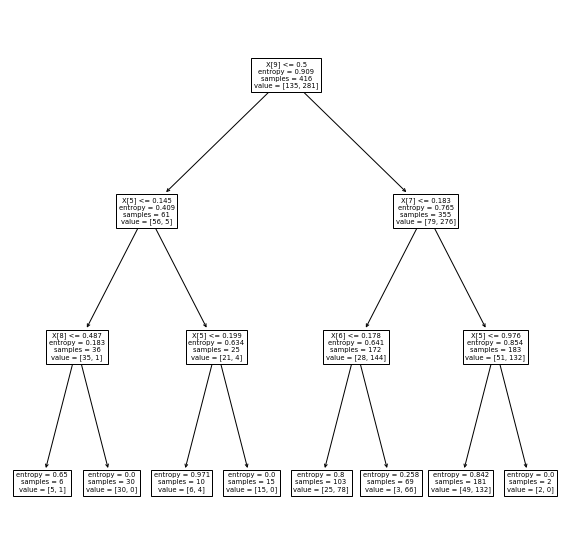

In [46]:
plt.figure(figsize=(10, 10))
plot_tree(tree_classifier)
plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
knn_classifier = knn_model.fit(x_train_norm, y_train)
knn_predictions = knn_classifier.predict(x_test_norm)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy * 100}")

KNN Accuracy: 88.46153846153845


In [49]:
tree_cls_report = classification_report(y_test, knn_predictions)
print(tree_cls_report)

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77        32
         1.0       0.86      1.00      0.92        72

    accuracy                           0.88       104
   macro avg       0.93      0.81      0.85       104
weighted avg       0.90      0.88      0.88       104



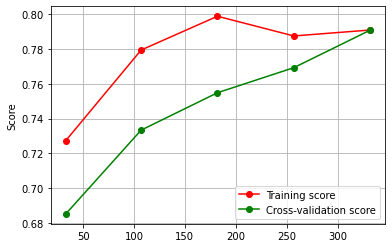

In [50]:
train_sizes, train_scores, test_scores = learning_curve(knn_model, x_train_norm, y_train, cv=None)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.ylabel('Score')
plt.legend(loc="lower right")
plt.grid()

Text(33.0, 0.5, 'Actual')

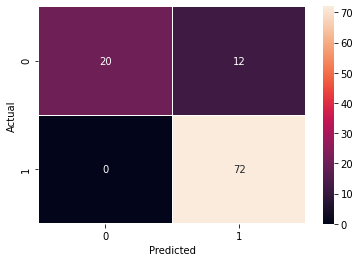

In [51]:
cm = confusion_matrix(y_test, knn_predictions)
sns.heatmap(cm, annot=True, linewidths=0.1)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
forest_model = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt')
forest_classifier = forest_model.fit(x_train_norm, y_train)
forest_predictions = forest_classifier.predict(x_test_norm)
forest_accuracy = accuracy_score(y_test, forest_predictions)
print(f"Forest Accuracy: {forest_accuracy * 100}")

Forest Accuracy: 88.46153846153845


In [54]:
tree_cls_report = classification_report(y_test, forest_predictions)
print(tree_cls_report)

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77        32
         1.0       0.86      1.00      0.92        72

    accuracy                           0.88       104
   macro avg       0.93      0.81      0.85       104
weighted avg       0.90      0.88      0.88       104



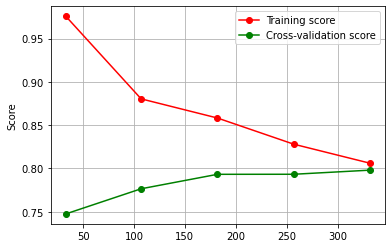

In [55]:
train_sizes, train_scores, test_scores = learning_curve(forest_model, x_train_norm, y_train, cv=None)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.ylabel('Score')
plt.legend(loc="upper right")
plt.grid()

Text(33.0, 0.5, 'Actual')

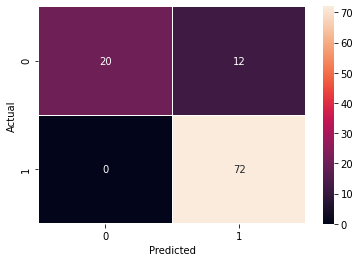

In [56]:
cm = confusion_matrix(y_test, forest_predictions)
sns.heatmap(cm, annot=True, linewidths=0.1)
plt.xlabel('Predicted')
plt.ylabel('Actual')